In [1]:
from pandas import read_csv, DataFrame, to_numeric, concat
from numpy import nan
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from yellowbrick.classifier import ConfusionMatrix
from os.path import exists
import scoreValidator #I create this function for managing the score of each model

In [2]:
# Checking for existing files
fileAddress ="data_address.txt"#I create this file for saving the database's address
try:
    if exists(fileAddress):
        with open(fileAddress,'r') as text_file:
            Addrs = text_file.readlines()
            Addrs = [addrs.rstrip('\n') for addrs in Addrs]
            Addrs = [addrs.rstrip(' ') for addrs in Addrs]
        text_file.close()
    else:
        print("The file 'data_address.txt' must exists in the main directory. It contains all the address of pre-processed data to reutilize in each model. Please creat it and run this program again.")
        FileNotFoundError("The file 'data_address.txt' must exists in the main directory. It contains all the address of pre-processed data to reutilize in each model. Please creat it and run this program again.")
except:
    print("An error occurred when reading the file: 'data_address.csv'")
    RuntimeError("An error occurred when reading the file: 'data_address.csv'")

In [3]:
# Reading the three pre-processed files for the model
cleaned2 = DataFrame()
significance_filtered = DataFrame()
var_filtered = DataFrame()
try:
    cleaned2 = read_csv(Addrs[0],sep=',')#This is the data without the low variance, significance filter and outliers expulsion
    significance_filtered = read_csv(Addrs[1],sep=',')#This is the model with the significance filter
    var_filtered = read_csv(Addrs[2],sep=',')#This is the model with the low variance filter
except:
    print("Fatal Error: the pre-processed files was not found.")
    FileNotFoundError("Fatal Error: the pre-processed files was not found.")

In [4]:
#Splitting the data
predictors_cleaned2 = cleaned2.iloc[:,1:]
class_cleaned2 = cleaned2.iloc[:,0]
#-----------------------------------------------
predictors_significance = significance_filtered.iloc[:,1:]
predictors_variance = var_filtered.iloc[:,1:]
#This class can be the same for both predictor_significance and predictor_variance because the number of rows didn't changed on those two filters
class_filtered = var_filtered.iloc[:,0]

In [5]:
#The machine will be trained with the previous years partial data and them whene model works just fine it will be trained with the whole previous years data set and tested with the presente year data set
X_train_cleaned2, X_test_cleaned2, y_train_cleaned2, y_test_cleaned2 = train_test_split(predictors_cleaned2,class_cleaned2,test_size=0.3,random_state=0)
#Splitting significance variables
X_train_significance, X_test_significance, y_train_significance, y_test_significance = train_test_split(predictors_significance,class_filtered,test_size=0.3,random_state=0)
#splitting variance variables
X_train_variance, X_test_variance, y_train_variance, y_test_variance = train_test_split(predictors_variance,class_filtered,test_size=0.3,random_state=0)


In [6]:
#Instantiating an object for each data set
naive_bayes_cleaned2 = GaussianNB()
naive_bayes_significance = GaussianNB()
naive_bayes_variance = GaussianNB()

In [7]:
#Fitting (finally)
naive_bayes_cleaned2.fit(X_train_cleaned2,y_train_cleaned2)
naive_bayes_significance.fit(X_train_significance,y_train_significance)
naive_bayes_variance.fit(X_train_variance,y_train_variance)

GaussianNB()

In [8]:
#Calculating predictions
prediction_cleaned2 = naive_bayes_cleaned2.predict(X_test_cleaned2)
prediction_significance = naive_bayes_significance.predict(X_test_significance)
prediction_variance = naive_bayes_variance.predict(X_test_variance)

In [9]:
#Confusion matrix
confusion_matrix_cleaned2 = confusion_matrix(y_test_cleaned2,prediction_cleaned2)
mcc_cleaned2 = matthews_corrcoef(y_test_cleaned2,prediction_cleaned2)
#Calculating various metrics
print("MCC Score:", mcc_cleaned2)
print("F2 Score:", scoreValidator.f2_score(confusion_matrix_cleaned2))
print("Weigthed Score:", scoreValidator.weigthedScore(confusion_matrix_cleaned2))#I create this function because others not perform well
confusion_matrix_cleaned2

MCC Score: 0.30547499059677724
F2 Score: 0.38934426229508196
Weigthed Score: 19.38317757009346


array([[7082,  242],
       [  14,   38]], dtype=int64)

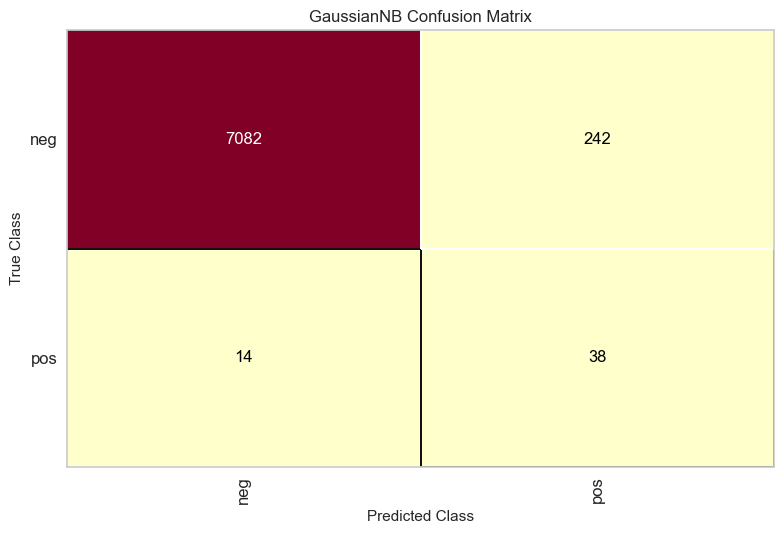

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [10]:
#Visualizing confusion matrix
visual_matrix_cleaned2 = ConfusionMatrix(GaussianNB())
visual_matrix_cleaned2.fit(X_train_cleaned2,y_train_cleaned2)
visual_matrix_cleaned2.score(X_test_cleaned2,y_test_cleaned2)
visual_matrix_cleaned2.poof()

In [11]:
#Confusion matrix Significance
confusion_matrix_significance = confusion_matrix(y_test_significance,prediction_significance)
mcc_significance = matthews_corrcoef(y_test_significance,prediction_significance)
print("MCC Score:", mcc_significance)
print("F2 Score:", scoreValidator.f2_score(confusion_matrix_significance))
print("Weigthed Score:", scoreValidator.weigthedScore(confusion_matrix_significance))
confusion_matrix_significance

MCC Score: 0.3328558545756571
F2 Score: 0.41589648798521256
Weigthed Score: 14.028037383177569


array([[7017,  288],
       [   7,   45]], dtype=int64)

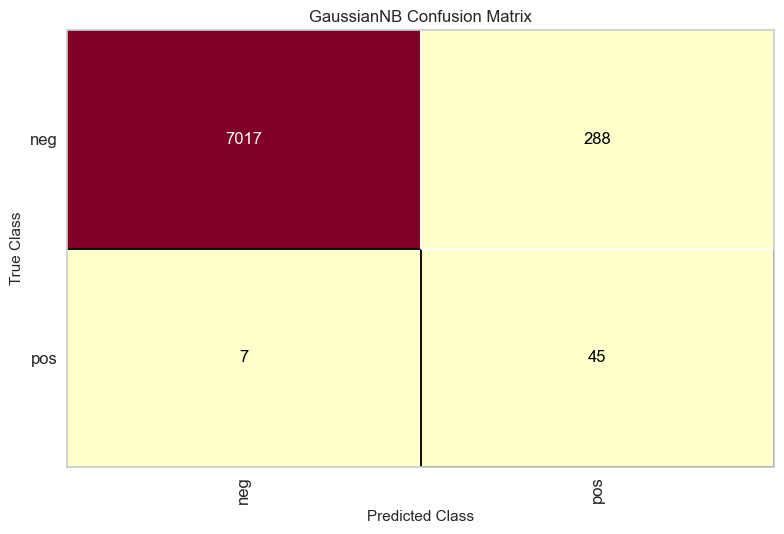

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [12]:
#Visualizing confusion matrix
visual_matrix_significance = ConfusionMatrix(GaussianNB())
visual_matrix_significance.fit(X_train_significance,y_train_significance)
visual_matrix_significance.score(X_test_significance,y_test_significance)
visual_matrix_significance.poof()

In [13]:
#Confusion matrix Variance
confusion_matrix_variance = confusion_matrix(y_test_variance,prediction_variance)
mcc_variance = matthews_corrcoef(y_test_variance,prediction_variance)
print("MCC Score:", mcc_variance)
print("F2 Score:", scoreValidator.f2_score(confusion_matrix_variance))
print("Weigthed Score:", scoreValidator.weigthedScore(confusion_matrix_variance))
confusion_matrix_variance

MCC Score: 0.34573229841249564
F2 Score: 0.4343629343629344
Weigthed Score: 13.598130841121495


array([[7040,  265],
       [   7,   45]], dtype=int64)

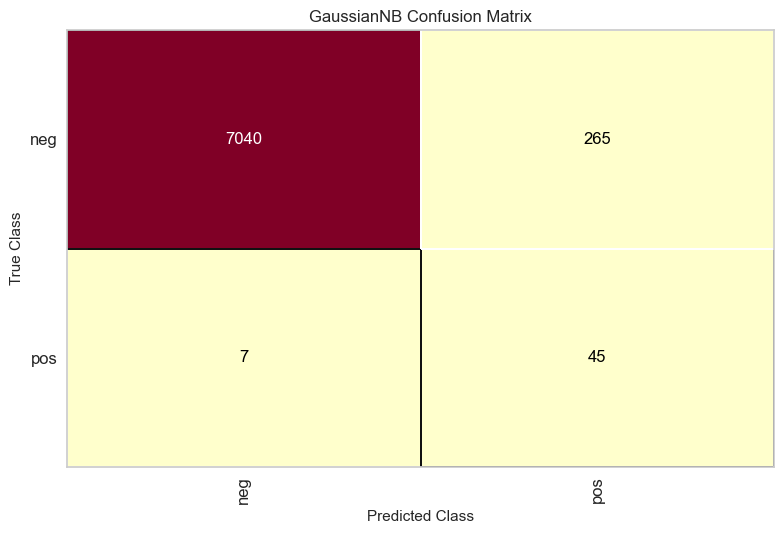

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [14]:
#Visualizing confusion matrix
visual_matrix_variance = ConfusionMatrix(GaussianNB())
visual_matrix_variance.fit(X_train_variance,y_train_variance)
visual_matrix_variance.score(X_test_variance,y_test_variance)
visual_matrix_variance.poof()

In [15]:
#As espectected the most filtered one is the most precise
print('\n')
print("Score of the model Naive Bayes with Trees Classifier dimensionality reduction:\n")
print("(The lower the best)")
print("\n")
print(scoreValidator.score(confusion_matrix_significance))
print("----------------------------------------------------------------\n")
print('\n')
print("Weigthed score of the model Naive Bayes with low variance filter dimensionality reduction:\n")
print("(The lower the best)")
print("\n")
print(scoreValidator.weigthedScore(confusion_matrix_variance))
print("----------------------------------------------------------------\n")



Score of the model Naive Bayes with Trees Classifier dimensionality reduction:

(The lower the best)


7505.0
----------------------------------------------------------------



Weigthed score of the model Naive Bayes with low variance filter dimensionality reduction:

(The lower the best)


13.598130841121495
----------------------------------------------------------------



In [16]:
#Based on the previous result we choose to use the low variance dimensionality reduction for the next step
# Checking for existing files
try:
    present_year_raw = read_csv("Data/air_system_present_year.csv")    
except:
    print("An error occurred when reading the file: 'data_address.csv'")
    RuntimeError("An error occurred when reading the file: 'data_address.csv'")

In [17]:
#Cleaning input sample
X_present_year = DataFrame(present_year_raw[var_filtered.columns]).iloc[:,1:].replace("na",nan).apply(to_numeric)
y_present_year = DataFrame(present_year_raw[var_filtered.columns]).iloc[:,0]
new_present_year_raw = concat([y_present_year,X_present_year],axis=1).dropna() 

In [18]:
X_present_year = new_present_year_raw.iloc[:,1:]
y_present_year = new_present_year_raw.iloc[:,0]
len(y_present_year)

11874

In [19]:
naive_bayes_variance = GaussianNB()
#Training the model with the whole previous years data
naive_bayes_variance.fit(predictors_variance,class_filtered)
prediction = naive_bayes_variance.predict(X_present_year)
confusion_matrix_var = confusion_matrix(y_present_year,prediction)
print(confusion_matrix_var)
print("Score of the model Naive Bayes with low variance filter dimensionality reduction:\n")
print("(The lower the best)")
print("\n")
print(scoreValidator.score(confusion_matrix_var))
print("----------------------------------------------------------------\n")
print("Weigthed score of the model Naive Bayes with low variance filter dimensionality reduction:\n")
print("(The lower the best)")
print("\n")
print(scoreValidator.weigthedScore(confusion_matrix_var))
print("----------------------------------------------------------------\n")

[[11541   254]
 [   18    61]]
Score of the model Naive Bayes with low variance filter dimensionality reduction:

(The lower the best)


13065.0
----------------------------------------------------------------

Weigthed score of the model Naive Bayes with low variance filter dimensionality reduction:

(The lower the best)


24.42056074766355
----------------------------------------------------------------



In [20]:
#Optimizing the best model
#Naive Bayes happens to be the best model based in our accuracy definition, so now is the momento for optimizing the best this model and get the best results
from accuracyMeassure import accuracyMeassure
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from numpy import ndarray

def accuracyMeassure(y_true:ndarray,y_predict:ndarray)->float:
    confusion_matrix_var = confusion_matrix(y_true,y_predict)
    return scoreValidator.score(confution_matrix_var=confusion_matrix_var)
#Defining a custome score
custom_score = make_scorer(accuracyMeassure)
#Defining parameters to be tested, we let it in blanck because we want it to auto-change them
param_grid = {}
#Cross validating 
grid_searcher = GridSearchCV(estimator=GaussianNB(),param_grid=param_grid,cv=10,scoring=custom_score)
grid_searcher.fit(predictors_variance,class_filtered)

print("Best parameters found:\n")
print(grid_searcher.best_params_)
print("\n")
print("Best scores found:\n")
print(grid_searcher.best_score_)
print("\n")

prediction = grid_searcher.best_estimator_.predict(X_present_year)
confusion_matrix_var = confusion_matrix(y_present_year,prediction)
print(confusion_matrix_var)
#This score is the cost of maintenance when using this ML
print("Score of the model Naive Bayes with variance dimensionality reduction:\n")
print("This score is the cost of maintenance when using this ML\n")
print("(The lower the best)")
print("\n")
print(scoreValidator.score(confusion_matrix_var))
print("----------------------------------------------------------------\n")
print("Weigthed score of the model Naive Bayes with variance dimensionality reduction:\n")
print("(The lower the best)")
print("\n")
print(scoreValidator.weigthedScore(confusion_matrix_var))
print("----------------------------------------------------------------\n")

Best parameters found:

{}


Best scores found:

3302.5


[[11541   254]
 [   18    61]]
Score of the model Naive Bayes with variance dimensionality reduction:

(The lower the best)


13065.0
----------------------------------------------------------------

Weigthed score of the model Naive Bayes with variance dimensionality reduction:

(The lower the best)


13065.0
----------------------------------------------------------------



In [21]:
#That's almost the half of the 2016 year expences as pressented at the beggining of the problem

In [22]:
var_filtered.columns

Index(['class', 'ac_000', 'ag_006', 'ah_000', 'ay_006', 'ay_008', 'az_004',
       'cd_000', 'cs_006', 'cv_000', 'du_000', 'eb_000'],
      dtype='object')

In [23]:
import pickle
pickle.dump(naive_bayes_variance,open("Final-Model/naive_bayes_variance.pkl","wb"))

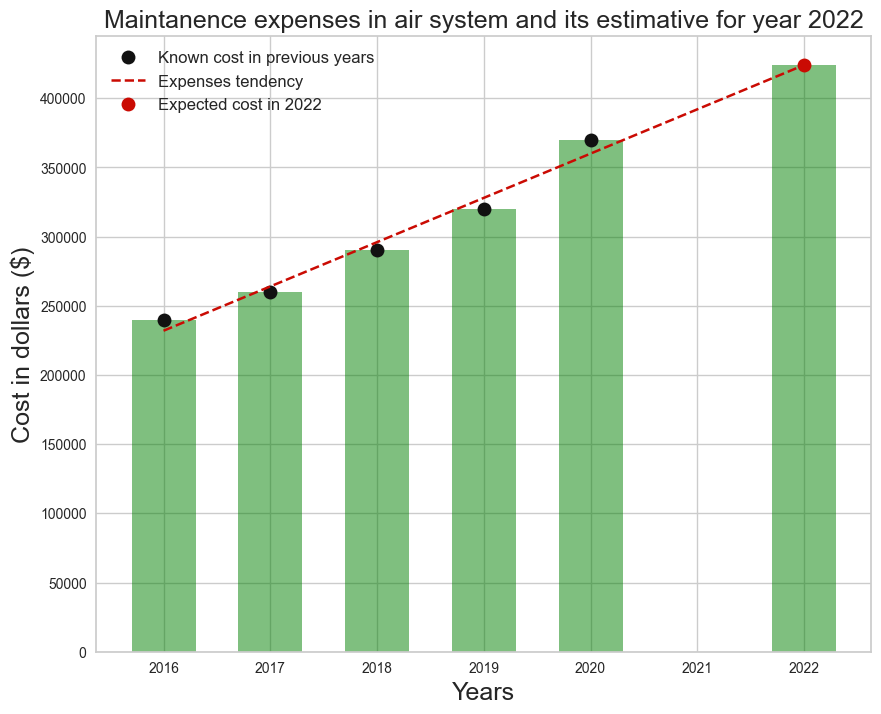

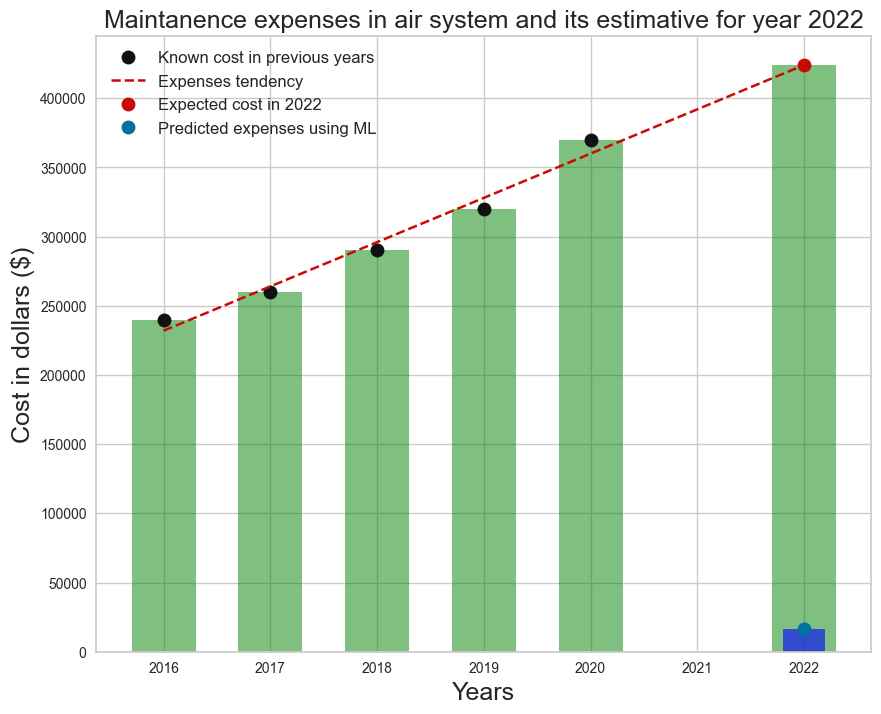

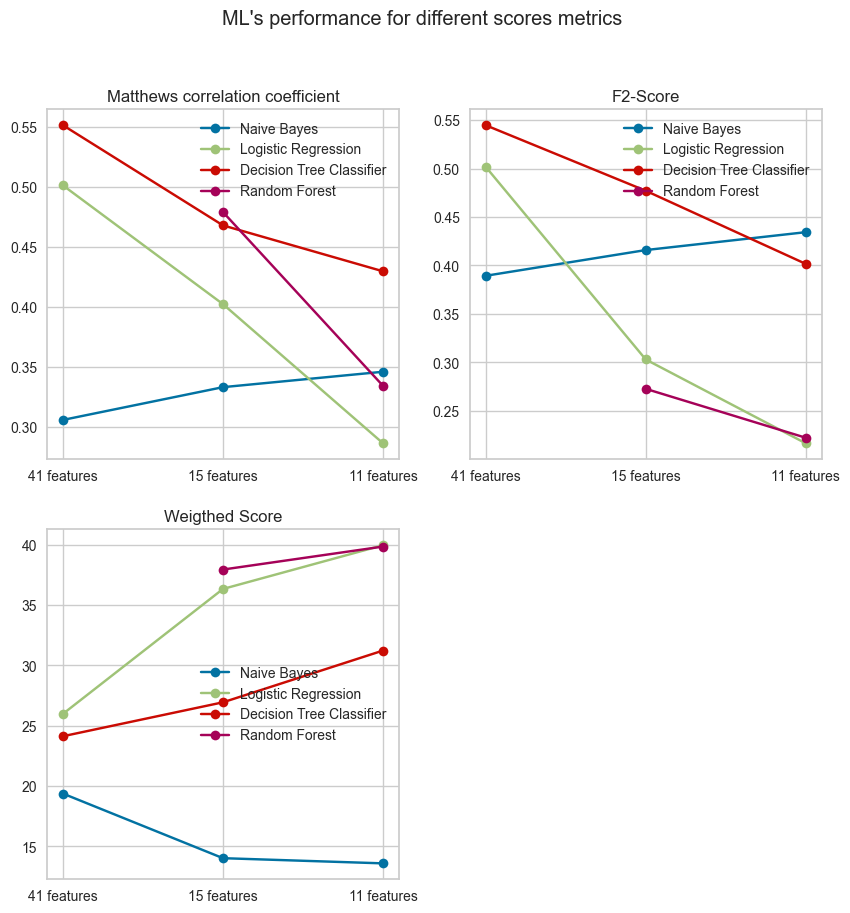

In [24]:
import efficiencyCalculator
efficiencyCalculator.financialImpact()
#Usign the weigthed score the best model is the Naive Bayes for the 11 features filter
efficiencyCalculator.modelComparision()